In [1]:
#visualizer
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
transformtoPIL = transforms.ToPILImage()
def unnormalize(img):
    #unnormalize the image
    for t, m, s in zip(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
        t.mul_(s).add_(m)
    img = transformtoPIL(img)
    return img
def visualize(sample_imgs_unstack, target_imgs_unstack, output_img, outpath = None):
    #visualize 11 sample images in the first row, 11 target images in the second row, and the 11 outputs of the model in the third row
    fig, axs = plt.subplots(3, 11, figsize=(20, 10))
    for i in range(11):
        sample_imgs_unnormalized = unnormalize(sample_imgs_unstack[i])
        target_imgs_unnormalized = unnormalize(target_imgs_unstack[i])
        output_img_unnormalized = unnormalize(output_img[i])
        axs[0, i].imshow(sample_imgs_unnormalized)
        axs[1, i].imshow(target_imgs_unnormalized)
        axs[2, i].imshow(output_img_unnormalized)
        axs[0, i].set_title(f"input:{i}")
        axs[1, i].set_title(f"target:{i}")
        axs[2, i].set_title(f"output:{i}")
        axs[0, i].axis('off')
        axs[1, i].axis('off')
        axs[2, i].axis('off')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

In [2]:
from simvp_model import SimVP_Model
from data import UnlabledtrainpredSim
model = SimVP_Model(in_shape=(11,3,160,240), hid_S= 64, hid_T= 512, N_T=8, N_S=4, drop_path=0.1)
train_dataset = UnlabledtrainpredSim(root='../small_dataset/val/')

In [3]:
import torch
model.load_state_dict(torch.load('model_best.pth', map_location='cpu'), 
            strict=True
        ) 

<All keys matched successfully>

torch.Size([1, 11, 3, 160, 240])


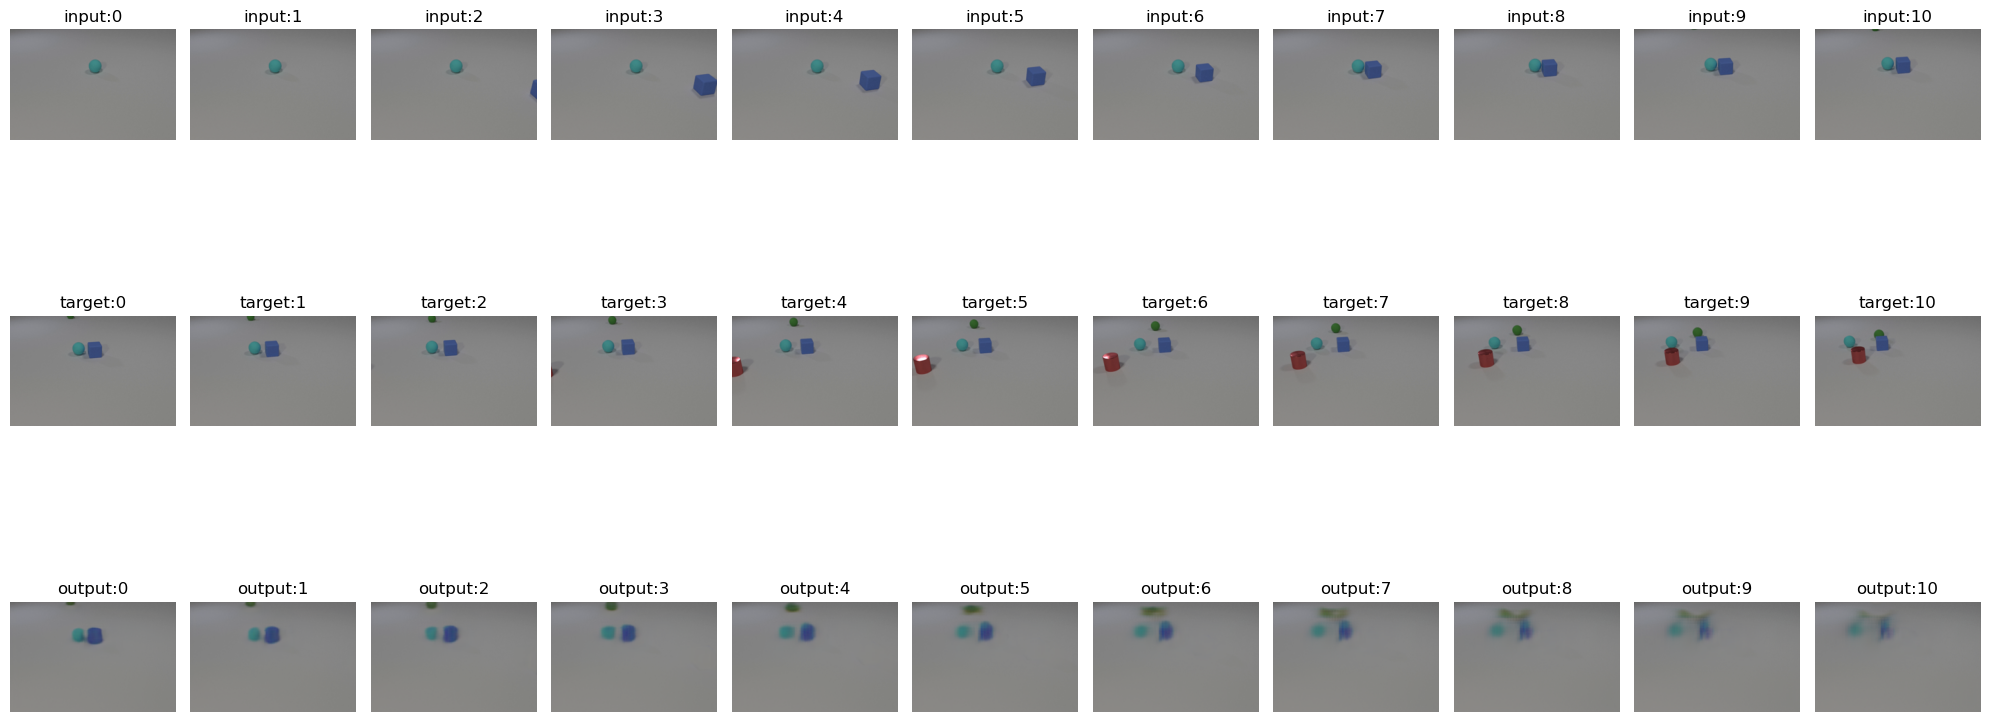

Sample image saved.


In [4]:
import random
model.eval()
with torch.no_grad():
    #generate a random number in range of dataset
    sample_imgs, sample_target = train_dataset[random.randint(0, len(train_dataset)-1)]

    #use x to input to model
    x = sample_imgs
    x = x.unsqueeze(0) #add batch dim
    output = model(x)
    print(output.shape)
    output = output.detach().cpu().squeeze(0)

    #unbind sequence dim
    sample_imgs_unstack = torch.unbind(sample_imgs, dim=0)
    sample_target_unstack = torch.unbind(sample_target, dim=0)
    output = torch.unbind(output, dim=0)
    visualize(sample_imgs_unstack, sample_target_unstack, output)
    print("Sample image saved.")

In [12]:
#loss test
from torch.nn import MSELoss
critertion = MSELoss(reduction='none')
x = torch.randn(1, 11, 3, 160, 240)
target = torch.randn(1, 11, 3, 160, 240)
y = model(x)
loss = critertion(y[:,10:,...], target[:,10:,...])
print(loss.shape)

torch.Size([1, 1, 3, 160, 240])


In [14]:
x = torch.randn(1, 11, 3, 160, 240).numpy()
type(x)

numpy.ndarray